# Water Potability Prediction

In [1]:
from skylearn import svm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
rawWaterData = pd.read_csv('./data/water_potability.csv')
rawWaterData

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
filledWaterData = rawWaterData.replace(float('NaN'), -1)
filledWaterData

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-1.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,-1.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,-1.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,-1.000000,392.449580,19.903225,-1.000000,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,-1.000000,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,-1.000000,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df = rawWaterData
potableDF = df[df['Potability'] == 1]
unPotableDF = df[df['Potability'] == 0]

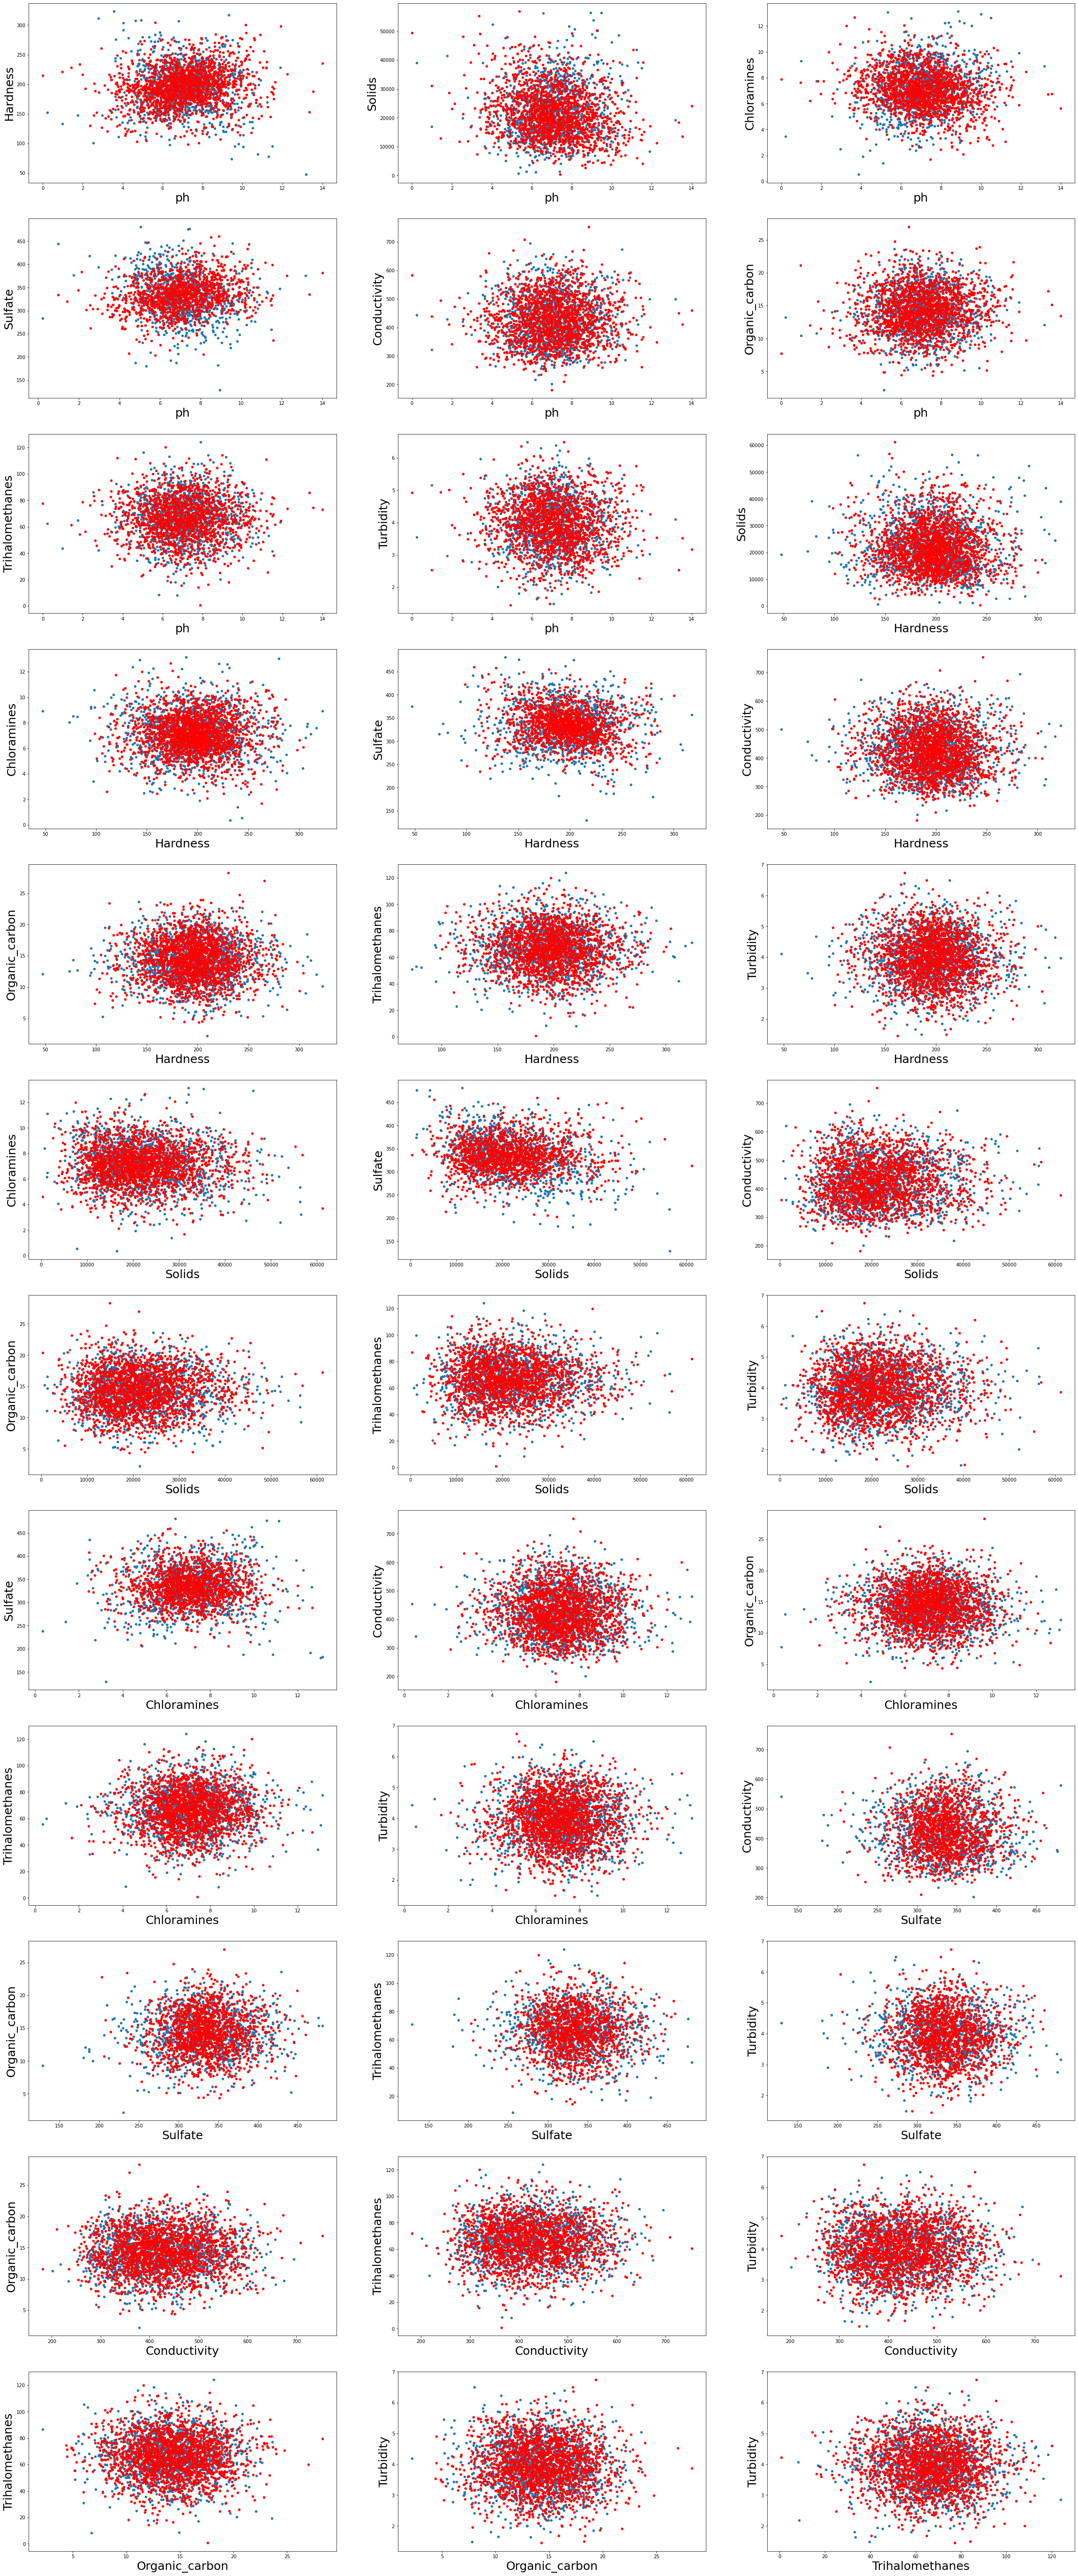

Blue: Potable
Red: Not potable


In [22]:
import itertools

features = list(df.keys())
features.remove('Potability')
featCombos = list(itertools.combinations(features, 2))
# axisLength = int(math.sqrt(len(featCombos)))
axWidth, axHeight = 3, 12
# axWidth, axHeight = 1, 36
figure, axis = plt.subplots(axHeight, axWidth)
figure.set_figheight(100)
# figure.set_figheight(500)
figure.set_figwidth(40)
cIndx = 0

for row in range(axHeight):
    for col in range(axWidth):
        feat1, feat2 = featCombos[cIndx]
        axis[row, col].set_xlabel(str(feat1), fontsize=25)
        axis[row, col].set_ylabel(str(feat2), fontsize=25)
#         axis[row, col].set_xticklabels(df[feat1].round(), fontsize=25)
#         axis[row, col].set_yticklabels(df[feat2].round(), fontsize=25)
        potableDF.plot(x=feat1, y=feat2, ax=axis[row, col], kind='scatter')
        unPotableDF.plot(x=feat1, y=feat2, ax=axis[row, col], kind='scatter', color='red')
#         ax = plt.gca()
#         potableDF.plot(x=feat1, y=feat2, ax=ax, kind='scatter')
#         unPotableDF.plot(x=feat1, y=feat2, ax=ax, kind='scatter', color='red')
#         plt.show()
        cIndx += 1
        
# plt.tight_layout()
plt.show()
print('Blue: Potable')
print('Red: Not potable')

In [ ]:
# unPotableDF.plot(subplots=True, kind='scatter', color='red')